In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_jackets = pd.read_pickle("jackets_list.pkl")

In [3]:
df_jackets.head()

,url,jacket_name,jacket_price,total_rating,num_reviews,review_titles,review_ratings,review_text
0,[https://www.evo.com/outlet/shell-jackets/thir...,[thirtytwo Light Anorak],[$134.99 SaleOrig: $199.95],[5.0],[4 Reviews],"[[Super cool and warm, Dry and warm, Stylish a...","[[5, 5, 5, 5]]",[[Great looking cool jacket waterproof and war...
1,[https://www.evo.com/insulated-jackets/l1-fair...,[L1 Fairbanks Jacket - Women's],[$298.95],[5.0],[1 Review],[[Love this]],[[5]],"[[So warm and comfortable. Easy to move in, ju..."
2,[https://www.evo.com/insulated-jackets/686-glc...,[686 GLCR Hydrastash Reserve Insulated Jacket],[$369.95],[0.0],[No Reviews],[[]],[[]],[[]]
3,[https://www.evo.com/outlet/shell-jackets/daki...,[Dakine Beretta 3L GORE-TEX Jacket - Women's],[$194.99 SaleOrig: $439.95],[4.7],[18 Reviews],"[[Definitely good in wet weather, Room to move...","[[4, 5, 5, 5, 5, 4, 5, 2, 5, 5, 5, 5, 5, 5, 5,...","[[Definitely ""stiffer"" jacket - rubs a little ..."
4,[https://www.evo.com/outlet/shell-jackets/oakl...,[Oakley Spellbound 2.0 Shell 3L GORE-TEX Jacke...,[$234.99 ClearanceOrig: $590.00],[5.0],[6 Reviews],[[I love this jacket and actually excited for ...,"[[5, 5, 5, 5, 5, 5]]",[[I do love this jacket! Iv had the same Oakle...


In [4]:
df_jackets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             1156 non-null   object
 1   jacket_name     1156 non-null   object
 2   jacket_price    1156 non-null   object
 3   total_rating    1156 non-null   object
 4   num_reviews     1156 non-null   object
 5   review_titles   1156 non-null   object
 6   review_ratings  1156 non-null   object
 7   review_text     1156 non-null   object
dtypes: object(8)
memory usage: 72.4+ KB


In [5]:
# Remove list format for all column values 

df_jackets["url"] = [i[0] for i in df_jackets["url"]]
df_jackets["jacket_name"] = [i[0] for i in df_jackets["jacket_name"]]
df_jackets["jacket_price"] = [i[0] for i in df_jackets["jacket_price"]]
df_jackets["total_rating"] = [i[0] for i in df_jackets["total_rating"]]
df_jackets["num_reviews"] = [i[0] for i in df_jackets["num_reviews"]]
df_jackets["review_titles"] = [i[0] for i in df_jackets["review_titles"]]
df_jackets["review_ratings"] = [i[0] for i in df_jackets["review_ratings"]]
df_jackets["review_text"] = [i[0] for i in df_jackets["review_text"]]

In [6]:
# Delete ski jackets that have missing information or no written reviews

df_jackets.dropna(subset = ["total_rating","jacket_price", "num_reviews"],inplace = True)
df_jackets.drop(df_jackets[df_jackets["num_reviews"] == "No Reviews"].index, inplace = True)
df_jackets.reset_index(drop = True, inplace = True)

In [7]:
# Unpack written review text in order to separate every review as one row

df_jackets = df_jackets.explode(["review_titles","review_ratings","review_text"])

In [8]:
# Add ski jacket manufacturer column to perform EDA

manufacturer = [name.split()[0] for name in df_jackets["jacket_name"]]

df_jackets.insert(loc=2, column='manufacturer', value=manufacturer)

df_jackets["manufacturer"] = df_jackets["manufacturer"].str.replace("The","The North Face")
df_jackets["manufacturer"] = df_jackets["manufacturer"].str.replace("Mountain","Mountain Hardware")

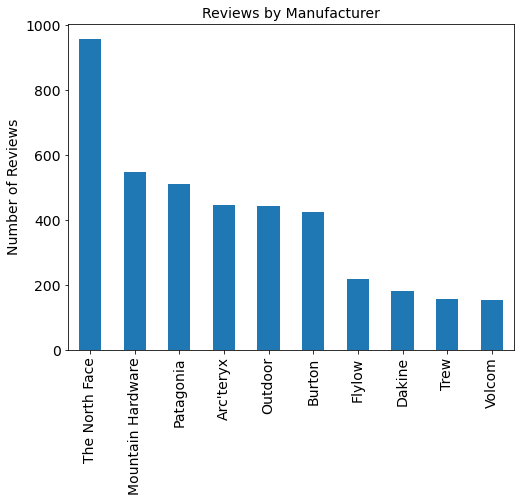

In [9]:
# Get a sense for distribution of different manufacturers within data set

ax = (df_jackets.groupby("manufacturer").count().sort_values("jacket_name",ascending = False)[["url"]]
      .head(10).plot(kind="bar",fontsize = 14, legend = None, figsize = (8,6)))
plt.title('Reviews by Manufacturer', fontsize=14)
plt.ylabel("Number of Reviews", fontsize=14)
plt.xlabel("")

plt.savefig("reviews_by_manufacturer.png", bbox_inches = "tight");

plt.show()

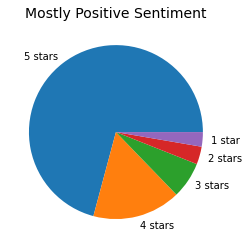

In [10]:
# Look at distribution of ratings (note most reviews have positive sentiment)

ratings_labels = ['5 stars','4 stars','3 stars','2 stars','1 star']
ratings_dist = df_jackets["review_ratings"].value_counts(normalize = True).tolist()

plt.pie(ratings_dist, labels = ratings_labels)
plt.title('Mostly Positive Sentiment', fontsize=14)
plt.savefig("ratings_dist.png", bbox_inches = "tight");

In [11]:
df_jackets.to_pickle("df_jackets_final.pkl")